In [1]:
import pickle
from tqdm import tqdm
import tensorflow as tf
import numpy as np

from preprocess import data_preparation
from preprocess import signal_cutter
from preprocess import data_filtering
from preprocess import resampling
from preprocess import RP_3D
from preprocess import resize_volume
from preprocess import RP_final_data
from preprocess import label_creator
from preprocess import including_data
from lime_utils import tp_finder
from lime_utils import lead_replacing
from lime_utils import weight_bars

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read dictionary pkl file
with open('/kaggle/input/georgia-dataset/data.pkl', 'rb') as fp:
    dataset = pickle.load(fp)

In [3]:
ds = data_preparation(dataset)

# shortening
ds = signal_cutter(ds, d_length=1000)

# denoising
ds = data_filtering(ds)

# resampling
ds = resampling(ds, desired_points = 100)

100%|██████████| 10344/10344 [00:01<00:00, 7022.84it/s]


In [4]:
arr = {'NSR':'426783006', 'AF':'164889003', 'IAVB':'270492004', 'LBBB':'164909002', 'RBBB':'59118001', 'SB':'426177001', 'STach':'427084000'}
labels = label_creator(data_preparation(dataset), arr)
x_train, y_train, x_test, y_test = including_data(labels, ds)
# transformation and resizing
tmp_x_test = RP_final_data(x_test)

100%|██████████| 10344/10344 [00:00<00:00, 949258.96it/s]
10344it [00:07, 1314.07it/s]
10344it [00:04, 2118.81it/s]
100%|██████████| 1126/1126 [05:32<00:00,  3.38it/s]


In [5]:
model = tf.keras.models.load_model('/kaggle/input/3decgnet/3DECGNet.h5')
pred_proba = model.predict(tmp_x_test)
prediction = np.zeros(np.shape(pred_proba))
prediction[pred_proba > 0.5] = 1

36/36 [==============================] - 15s 337ms/step


In [6]:
neigh_mx = lead_replacing()

# !!!!!!Change arrhythmia
tp_samples = tp_finder(prediction, y_test, 'STach', arr)

In [7]:
print('N of Samples:', len(tp_samples))

N of Samples: 210


In [8]:
from sklearn.linear_model import LogisticRegression
cof = []
counter = 101

for i in tp_samples[100:]:
    print('sample numbet', counter)
    counter = counter + 1
    neighbors = []
    for j in neigh_mx:
        neighbors.append(j * x_test[i])
    neighbor_tr = RP_final_data(neighbors)
    p = model.predict(neighbor_tr)
    pp = np.zeros(np.shape(p))
    pp[p > 0.5] = 1
    wei = []
    for k in np.squeeze(neigh_mx):
        wei.append(sum(k)/12)
    lr = LogisticRegression()
    
    # !!!!!!Change arrhythmia
    lr.fit(np.squeeze(neigh_mx), pp[:,6], sample_weight = wei)
    
    cof.append(lr.coef_)

sample numbet 101


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 9s 356ms/step
sample numbet 102


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 103


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 104


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 105


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 106


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 107


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 108


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 109


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 110


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 111


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 112


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 113


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 114


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 115


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 116


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 117


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 118


100%|██████████| 793/793 [03:52<00:00,  3.40it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 119


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 120


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 121


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 122


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 123


100%|██████████| 793/793 [03:55<00:00,  3.37it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 124


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 125


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 126


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 127


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 128


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 129


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 130


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 131


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 132


100%|██████████| 793/793 [03:55<00:00,  3.36it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 133


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 134


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 135


100%|██████████| 793/793 [03:54<00:00,  3.37it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 136


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 137


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 138


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 139


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 140


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 141


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 142


100%|██████████| 793/793 [03:55<00:00,  3.37it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 143


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 144


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 145


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 146


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 147


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 148


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 149


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 150


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 151


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 152


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 153


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 154


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 155


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 156


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 157


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 158


100%|██████████| 793/793 [03:57<00:00,  3.34it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 159


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 160


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 161


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 162


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 163


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 164


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 165


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 166


100%|██████████| 793/793 [03:55<00:00,  3.37it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 167


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 168


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 169


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 170


100%|██████████| 793/793 [03:55<00:00,  3.37it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 171


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 172


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 173


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 174


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 175


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 176


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 177


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 178


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 179


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 180


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 181


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 182


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 183


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 184


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 185


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 186


100%|██████████| 793/793 [03:58<00:00,  3.33it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 187


100%|██████████| 793/793 [03:55<00:00,  3.37it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 188


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 189


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 190


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 191


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 192


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 193


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 194


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 195


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 196


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 197


100%|██████████| 793/793 [03:55<00:00,  3.36it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 198


100%|██████████| 793/793 [03:55<00:00,  3.37it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 199


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 200


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 201


100%|██████████| 793/793 [03:54<00:00,  3.38it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 202


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 203


100%|██████████| 793/793 [03:54<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 204


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 205


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 206


100%|██████████| 793/793 [03:56<00:00,  3.35it/s]


25/25 [==============================] - 8s 338ms/step
sample numbet 207


100%|██████████| 793/793 [03:53<00:00,  3.39it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 208


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 209


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step
sample numbet 210


100%|██████████| 793/793 [03:53<00:00,  3.40it/s]


25/25 [==============================] - 8s 337ms/step


In [9]:
cf2 = np.squeeze(cof)

In [10]:
my_dict = {
    'Lead I':cf2[:,0],
    'Lead II':cf2[:,1],
    'Lead III':cf2[:,2],
    'Lead avF':cf2[:,3],
    'Lead avR':cf2[:,4],
    'Lead avL':cf2[:,5],
    'Lead V1':cf2[:,6],
    'Lead V2':cf2[:,7],
    'Lead V3':cf2[:,8],
    'Lead V4':cf2[:,9],
    'Lead V5':cf2[:,10],
    'Lead V6':cf2[:,11]
}

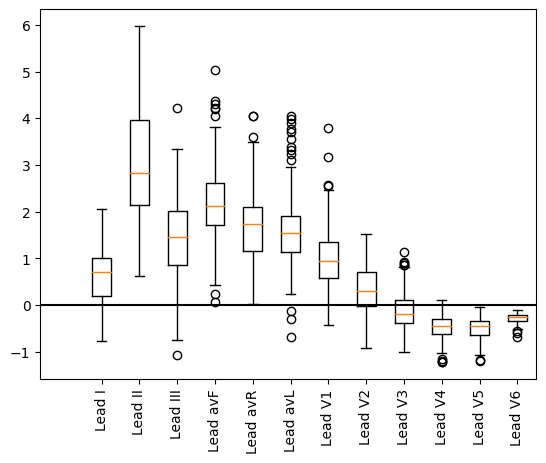

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
plt.axline((0,0),(11,0),color='black')
ax.set_xticklabels(my_dict.keys())
plt.xticks(rotation=90)
plt.show()

In [12]:
np.savez('/kaggle/working/Stachweights_2' , cf2)